## Visualizing some Data

Ryan Melehan

In [5]:
# import some libraries
import sklearn
import sklearn.datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

### Data

For data, I am going to import the Boston housing project example data set from Sci-Kit Learn.

I'll be visualizing different aspects of the data to guide my investigation further

In [14]:
data = sklearn.datasets.load_boston()

In [15]:
# print the description of the data set
print(data["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [16]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [18]:
df = pd.DataFrame(data=data["data"], columns=data["feature_names"])

### Preview Data Frame
I want to look at the data frame before I continue, just to get a sense of the value types / format


In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [22]:
len(df)

506

### Merge Frames
Seems like I'm missing the price of the houses, which is most likely stored in the `target` section of the data dictionary. I will now merge the two frames (`target`, and `data`)

In [25]:
df["PRICE"] = data["target"]

Check to see if it worked (hint: it did)

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Visualizing the data

Now that we have the target and features all in one dataframe, we can plot against all different types of values
I want to see if the price of a house is affected by the crime rate (I would guess that it would affect the price negatively)

In [28]:
sns.set(style="darkgrid")

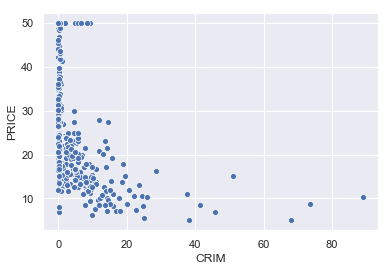

In [29]:
sns.scatterplot(x=df["CRIM"], y=df["PRICE"])

It seems pretty hard to tell from this angle, so I will switch the axis to help aide visually

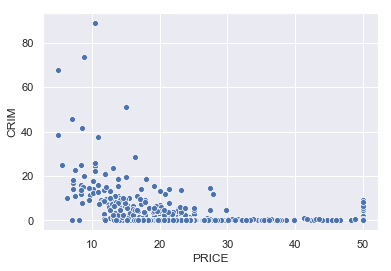

In [30]:
sns.scatterplot(x=df["PRICE"], y=df["CRIM"])

It seems like there is less crime as the price gets higher, but doesn't seem too correlated

I want to now plot a histogram of housing prices to understand the distribution

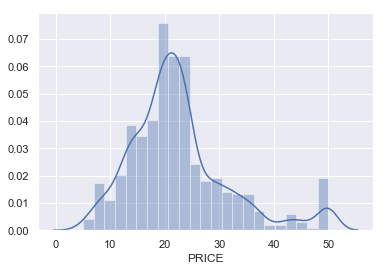

In [32]:
sns.distplot(a=df["PRICE"])

It seems like the values lie around 200,000, but don't seem to be incredibly normal in shape. I want to now plot the pupil-student ratio vs the housing price to see if more expensive houses equates to more teachers. To do this I am going to plot a scatter plot, as well as two overlayed histograms.

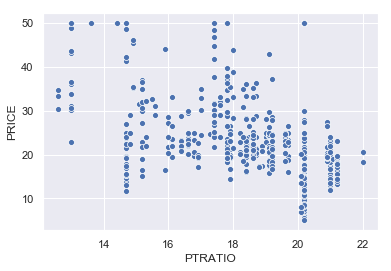

In [34]:
sns.scatterplot(x=df["PTRATIO"], y=df["PRICE"])

I don't see any particular relationship between Pupil-Teacher ratio and Price. I now want to check other properties. This next property will be Rooms per dwelling.

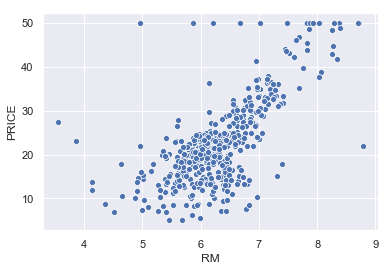

In [38]:
sns.scatterplot(x=df["RM"], y=df["PRICE"])

This seems to have much more of a correlation than the other metrics I measured. But, I'd still like to take a look at some other features. I think that I could create a linear model around the Room per Dwelling feature, but I would like to make it multi-dimensional by finding some other metrics that could help in the model's creation.


My next question is regarding the `ZN` feature (how many big lots are there in the town?)
bigger lots can indicate large land ownership, which only wealthy people can afford usually.

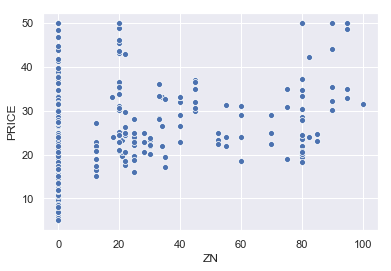

In [39]:
sns.scatterplot(x=df["ZN"], y=df["PRICE"])

**NOPE**

Now I want to look at house age (i.e. proportion of houses built before 1940). This could go both ways, as older houses could be considered `antique` which might bring their value up, but at the same time, older houses could signal township poverty or delapidated neighborhoods.

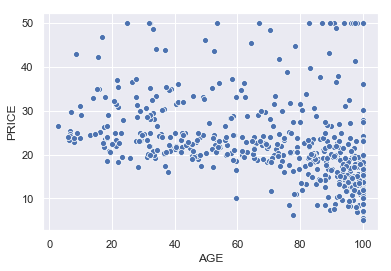

In [42]:
sns.scatterplot(x=df["AGE"], y=df["PRICE"])

It seems like there is a slight relationship, but nothing crazy. Maybe just coincidence? I'm not sure.
I want to keep looking around though. The next feature is `DIS`, or the weighted distance from 5 boston employement centers. This could be pretty telling, but I'm not sure in what way. Usually, places close to / in the city, like Boston, are very, very expensive. But, in some cities, the suburbs are the nice parts, and the inner city is the poor part. Let's see what it looks like.

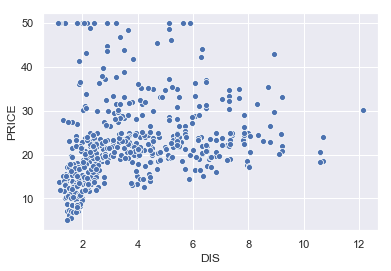

In [43]:
sns.scatterplot(x=df["DIS"], y=df["PRICE"])

**Weird**. Doesn't look like the price is too affected by the distance. Looks like cheap housing is offered close to employement centers

I want to take a look at the `B` score, or the `Black` score. A modified proportion of blacks per town.

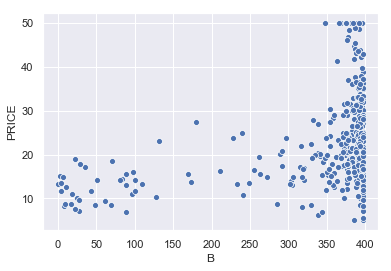

In [44]:
sns.scatterplot(x=df["B"], y=df["PRICE"])

All over the place. These don't look connected at all.